### Eluvio DS Challenge Option 1
#### Created by Chun Yin KONG

In [45]:
## Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
## reading data
data = pd.read_csv("Eluvio_DS_Challenge.csv")

### Understanding the data set

In [47]:
data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [48]:
data.shape

(509236, 8)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [50]:
data.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


In [51]:
data['over_18'].value_counts()

False    508916
True        320
Name: over_18, dtype: int64

In [52]:
data.isnull().any()

time_created    False
date_created    False
up_votes        False
down_votes      False
title           False
over_18         False
author          False
category        False
dtype: bool

In [53]:
col_list = list(data)
drop_col_list = []
for col_names in col_list:
    if len(data[str(col_names)].unique()) - 1 == 0:
        print(str(col_names), ": all duplicated values")
        drop_col_list.append(str(col_names))
    else:
        print(str(col_names), ": has unique values")

time_created : has unique values
date_created : has unique values
up_votes : has unique values
down_votes : all duplicated values
title : has unique values
over_18 : has unique values
author : has unique values
category : all duplicated values


## Data processing

In [54]:
data = data.drop(drop_col_list, axis=1)

In [55]:
# after dropping all duplicated value's column
data.head()

,time_created,date_created,up_votes,title,over_18,author
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans


## Data Visualization

In [33]:
from datetime import datetime
data['date_created'] = datetime.strptime(data['date_created'], "%y-%m-%d")

TypeError: strptime() argument 1 must be str, not Series

Text(5, 100000, '50 Percentile')

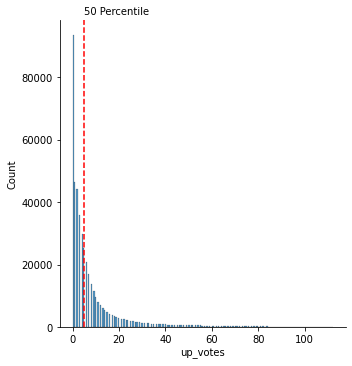

In [56]:
sns.displot(data, x=data[data['up_votes']<=112]['up_votes'], bins=200)
plt.axvline(5, linestyle = '--', c='red')
plt.text(5,100000, "50 Percentile")

## Title Pre-Processing

In [13]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag

## Algorithms for Classification

### Dataset Pre-Processing to reduce RAM usage

In [104]:
from random import sample
import random
random.seed(2021)
data_filtered = data[data['up_votes']<=np.percentile(data['up_votes'], 95)]
data_sampled = data_filtered.sample(frac=0.01)
len(data_sampled)

4838

In [105]:
from sklearn.model_selection import train_test_split

title = data_sampled['title'].values
up_votes = data_sampled['up_votes'].values

title_train, title_test, up_votes_train, up_votes_test = train_test_split(title, up_votes, test_size=0.25, random_state=42)

### Testing using Logistic Regression

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(title_train)

title_train = vectorizer.transform(title_train)
title_test = vectorizer.transform(title_test)
title_train

<3628x9404 sparse matrix of type '<class 'numpy.int64'>'
	with 46416 stored elements in Compressed Sparse Row format>

In [107]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(title_train, up_votes_train)
score = classifier.score(title_test, up_votes_test)

/home/kelvin/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
print("Accuracy", score)

Accuracy 0.1537190082644628


### Building Neural Network

In [109]:
from keras.models import Sequential
from keras import layers

input_dim = title_train.shape[1]

model = Sequential()
model.add(layers.Dense(64, input_dim = input_dim, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [110]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                601920    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 603,033
Trainable params: 603,033
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.fit(title_train, up_votes_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(title_test, up_votes_test),
                    batch_size=25)

In [112]:
from keras.backend import clear_session
clear_session()

In [113]:
loss, accuracy = model.evaluate(title_train, up_votes_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(title_test, up_votes_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.0888
Testing Accuracy:  0.1017
